# Salary Prediction in XYZ company

## Custom code

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
from IPython.display import Image

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


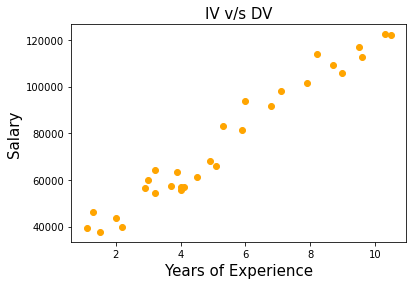

In [73]:
# Scatter plot
plt.scatter(df.YearsExperience, df.Salary, c='orange')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('IV v/s DV', fontsize=15)
plt.show()

In [5]:
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [10]:
len(X_train), len(X_test)

(20, 10)

### Model

$$ \hat{Y} = \beta_0 + \beta_1x +\epsilon $$              $$\epsilon = error$$ 
The error term $\epsilon$ follows a normal distribution

Equation: -               $$\hat{y} = mx_i + c$$

$\hat{y}$ is not an exact point for corresponding $x$. It is the mean of distribution for the $\hat{y}$ values. The prediction by our regression models actually predicts a range of possible values for $\hat{y}$ for corresponding values of $x$. Hence, $\hat{y}$ is always the mean value of $\hat{y}$.

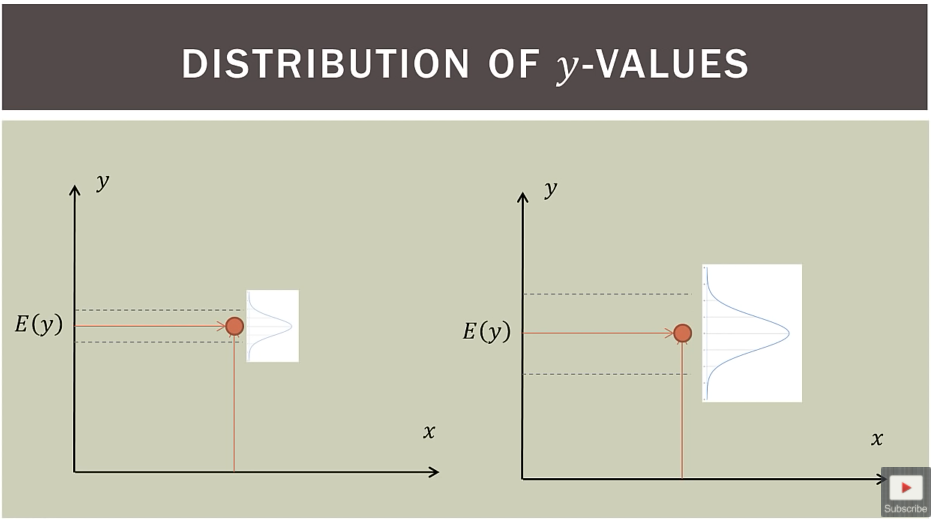

In [74]:
Image("D:/Yash/Capture2.PNG", width=700, height=600, embed=True)

### Cost Function

SSE/OLS  : -                   $$ J =  \sum_{i=1}^{n}{( \hat{y}  - y_i)^2} $$

MSE (population):-                         $$  J = \frac{\sum_{i=1}^{n}{( \hat{y}  - y_i)^2}}{N}  $$

MSE (sample):-                         $$  J = \frac{\sum_{i=1}^{n}{( \hat{y}  - y_i)^2}}{N-2}  $$

$N$ = degrees of freedom (in this case, 28 ($30-2$))

### Gradient Descent

Updating m :-                $$  m = m -  \alpha \frac{\partial J}{\partial m}  $$         

$\alpha$ = learning rate 

Updating c :-                                   $$  c = c -  \alpha \frac{\partial J}{\partial c}  $$

Since $$ \hat{y} =  mx_i +c $$ 

 $$ J =  \sum_i^n ({mx_i +c - y_i})^2 $$
 
 
 
 
 $$ \frac{\partial J}{\partial m} = 2\sum_i^n ({mx_i +c - y_i})x_i $$
 
 == > $$ \frac{\partial J}{\partial m} = 2\sum_i^n ({\hat{y} - y_i})(x_i) $$
 &
 $$ \frac{\partial J}{\partial c} = 2\sum_i^n ({mx_i +c - y_i})(1) $$
 
 == > $$ \frac{\partial J}{\partial c} = 2\sum_i^n ({\hat{y} - y_i}) $$

##### Therefore :                              $$ m = m -   2 \alpha \sum_i^n [({\hat{y} - y_i})(x_i)] $$

&                             $$ c = c -  2 \alpha \sum_i^n ({\hat{y} - y_i}) $$

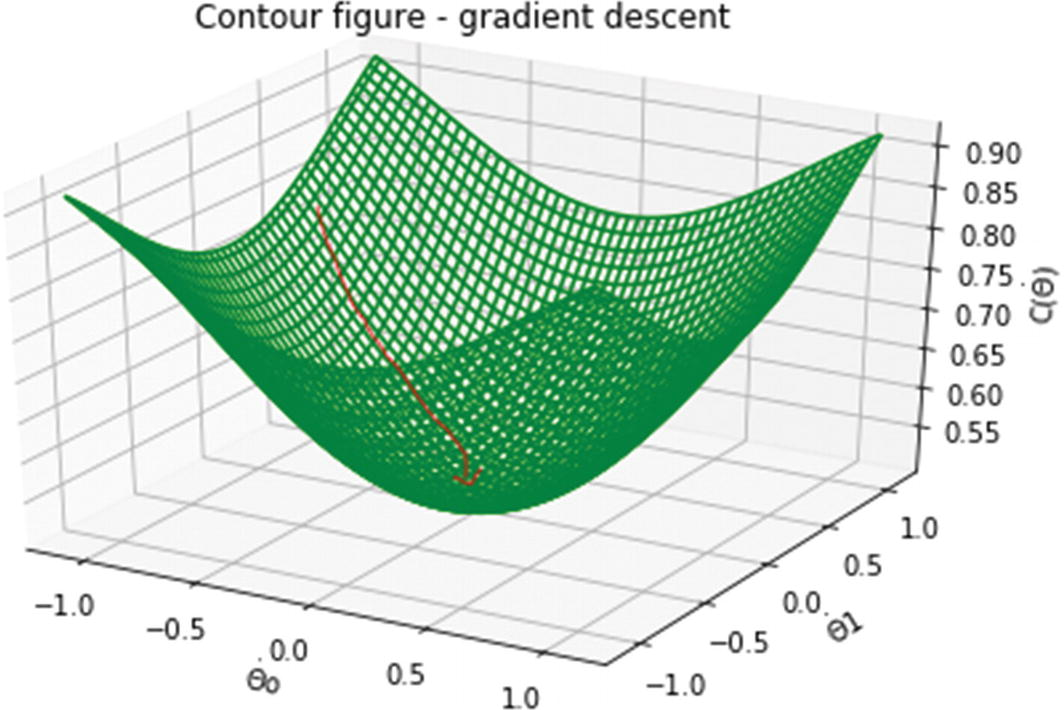

In [75]:
Image("D:\Yash\Gradient Descent.jpg", width = 500, height = 400, embed=True) #z-axis = SSE, x-axis = m, y-axis = c

In [47]:
# MODEL

alpha = 0.001
epochs = 2000
m = 0
c = 0
n = len(X_train)

while epochs > 0:
    y_pred = m*X_train + c
    error = (y_pred - Y_train)
    sse = sum(error**2)
    
    m = m - alpha * 2 * sum(error * X_train)
    c = c - alpha * 2 * sum(error)
    
    epochs -= 1
    
    if (epochs%200==0):
        print(f"SSE : {sse}")
        print(f"m = {m}, c = {c}\n")

SSE : 821349306.3669453
m = 10060.34264857995, c = 22502.55090034571

SSE : 739652044.808233
m = 9471.244953263564, c = 26059.599393016517

SSE : 737138747.3024908
m = 9367.919927070083, c = 26683.489337925068

SSE : 737061429.3577781
m = 9349.79719272099, c = 26792.916764669448

SSE : 737059050.7835901
m = 9346.618548471984, c = 26812.10983200709

SSE : 737058977.6102126
m = 9346.06102889094, c = 26815.47620773926

SSE : 737058975.3591397
m = 9345.963242520744, c = 26816.066654558985

SSE : 737058975.2898887
m = 9345.94609124118, c = 26816.170216215407

SSE : 737058975.2877585
m = 9345.943082985634, c = 26816.188380453605

SSE : 737058975.2876929
m = 9345.942555351448, c = 26816.191566377427



In [48]:
y_pred = m * X_test + c      # predicting with test dat

$$ Salary = m*YrsExperience + c $$

In [46]:
m, c  # with MSE (SSE)

(11057.892474634154, 16479.215325718436)

In [49]:
m, c # with OLS method (SSE)

(9345.942555351448, 26816.191566377427)

#### Centroid : -                        $$centroid = (\overline{x}, \overline{y})$$

#### The regression line ALWAYS passes through the centroid of the graph / data

In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


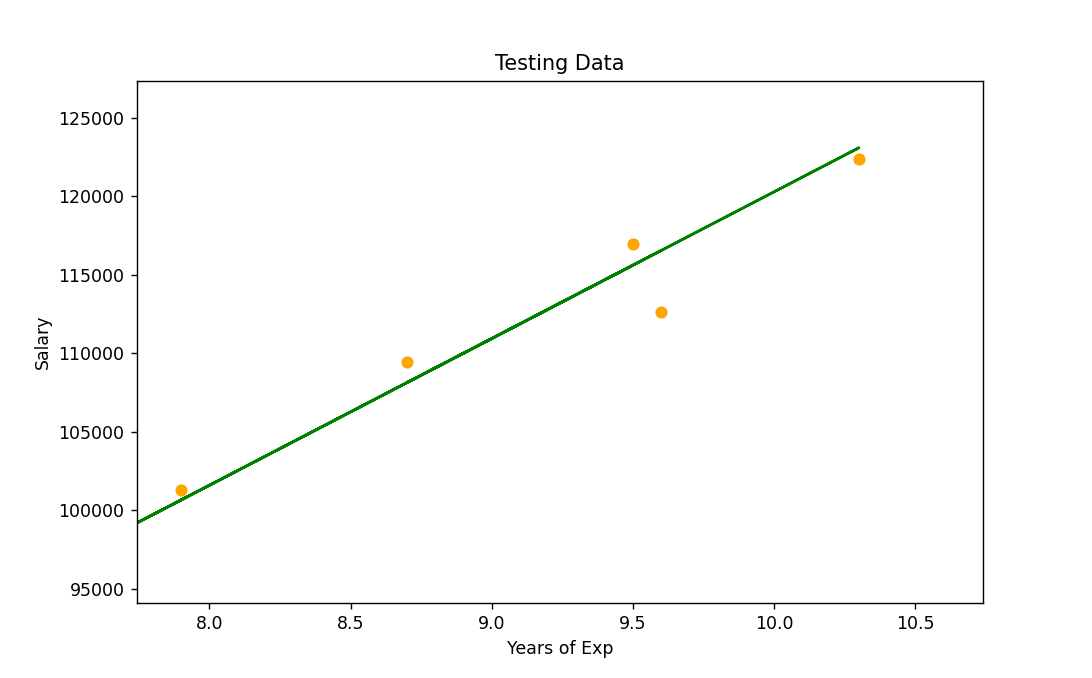

In [40]:
plt.scatter(X_test, Y_test, color='orange')
plt.plot(X_test, y_pred, color='green')
plt.xlabel('Years of Exp')
plt.ylabel("Salary")
plt.title('Testing Data')
plt.show()

<IPython.core.display.Javascript object>


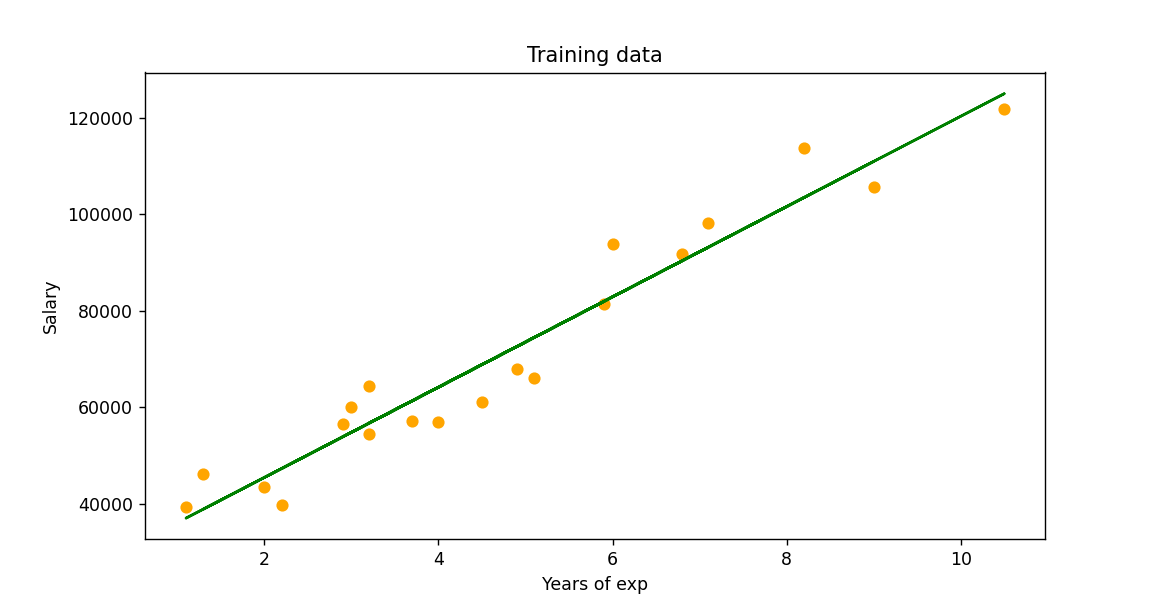

In [51]:
y_pred = m * X_train + c         # predicting on train data (same thing)
plt.scatter(X_train, Y_train, color='orange')
plt.plot(X_train, y_pred, color='green')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.title('Training data')
plt.show()

Scatter plots between the $x_i$ v/s residuals and $\hat{y_i}$ v/s residuals are also analysed to study about patterns in residuals to find out about homoscedesticity & heteroscedesticity and also to look for outliers

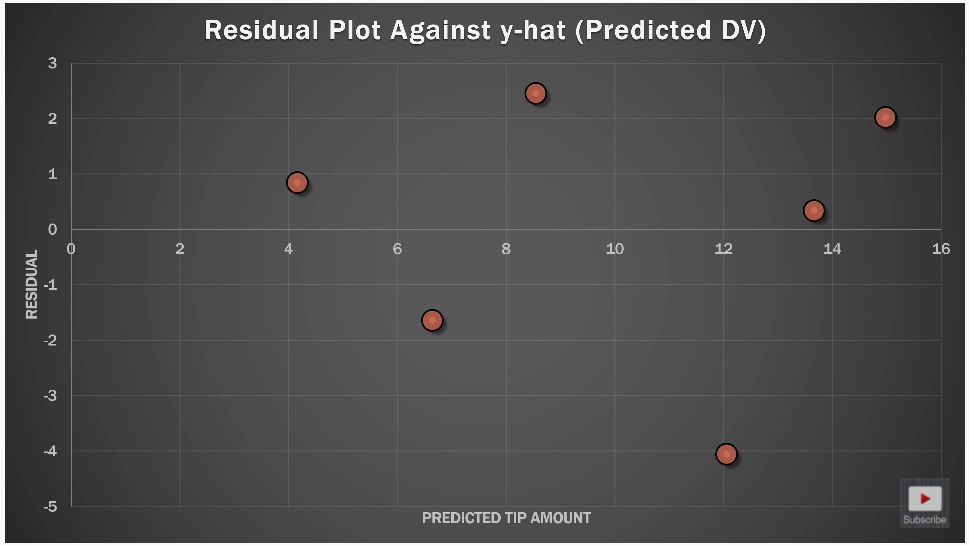

In [64]:
Image("D:/Yash/Capture4.PNG", width=600, height=520, embed=True)
# Here's what it looks like

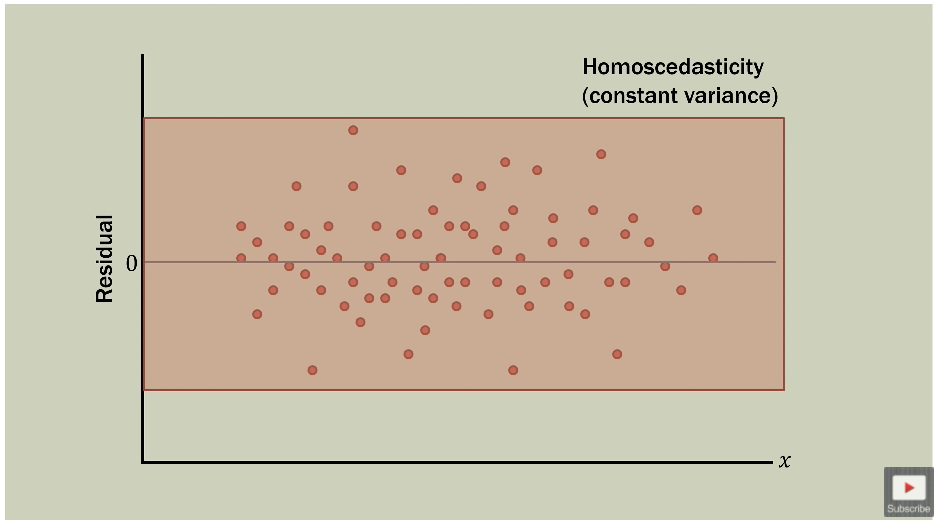

In [63]:
Image("D:/Yash/Capture5.PNG", width=500,height=400, embed=True)

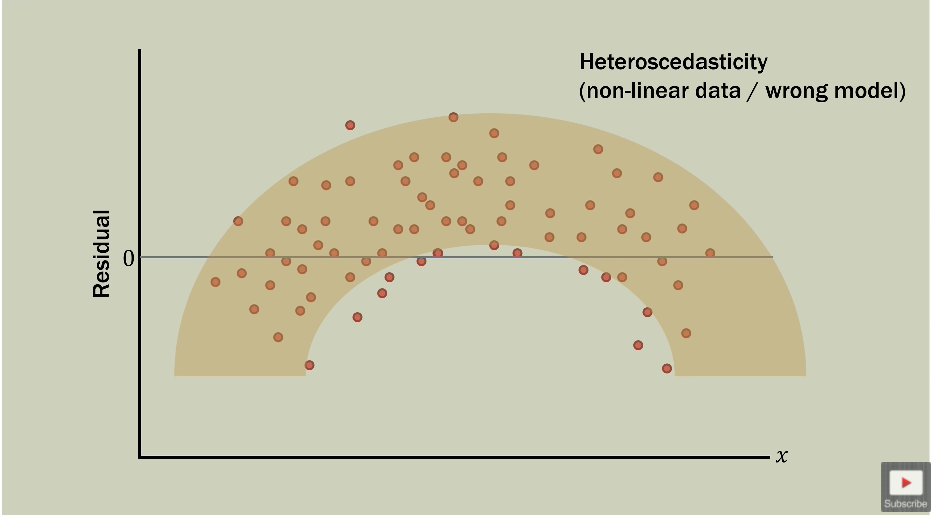

In [62]:
Image("D:/Yash/Capture6.PNG", width=500,height=400, embed=True)

In [41]:
r2_score(Y_test, y_pred)         # r2 = SSR / SST

0.9749154416958201

 $$ r^2 = \frac{SSR}{SST}$$ 

In [42]:
# Comparing SSR with respect to SST i.e. how well is the variation in DV explained by the DV when compared to a 
# model where there was no IV

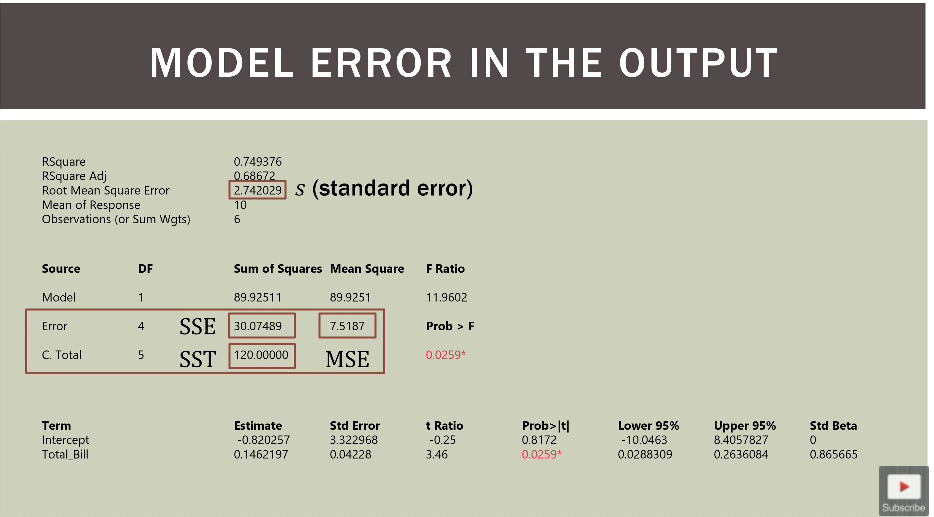

In [77]:
Image("D:/Yash/Capture3.PNG", embed=True)# Stats Tabel
                                         # It consists of mainly 3 tables :- 
                                         #             (i) Summary Table
                                         #            (ii) ANOVA Table
                                         #           (iii) Coefficients Table

$s$ standard error = The average of error i.e. the avg of how far off an observation actually lies from out regression line in units of the DV

#### Statistical Significance of the coefficients and of the model (F-test, t-test, p -value, confidence interval etc.)

$$s = \sqrt{MSE} = \sqrt{\frac{SSE}{N-2}}$$

$$ SST - SSE = SSR $$

$$ SST = \sum{i=1}^{n}{(y_i - \overline{y})^2} $$
$$ SSE = \sum{i=1}^{n}{(y_i - \hat{y_i})^2} $$
$$ SSR = \sum{i=1}^{n}{(\hat{y_i} - \overline{y})^2} $$

#### SST = total variation in DV with respect to its mean
#### SSE = unexplaiend variation / error by the regression model / IV
#### SSR = explained variation / error in DV by IV / regression model

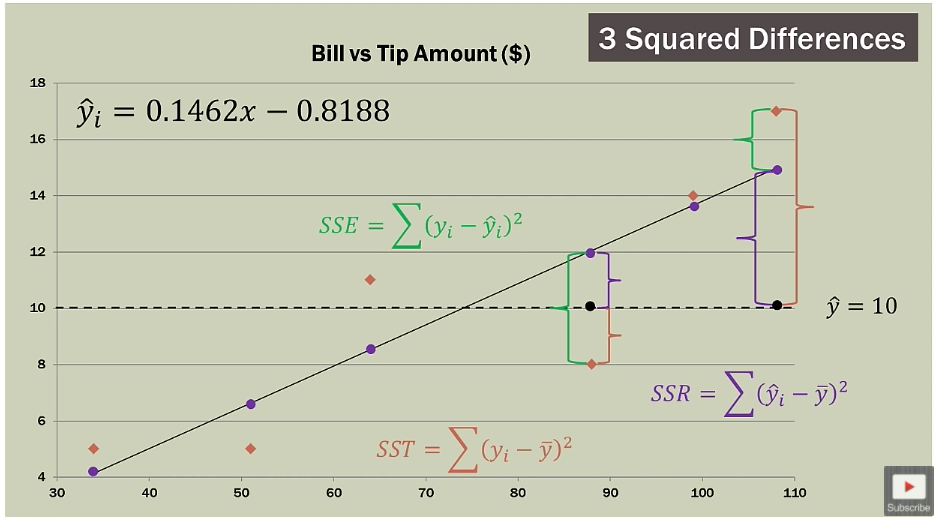

In [78]:
Image('D:/Yash/Capture.PNG' , width = 600, height=500, embed=True)

## Statistics method

Statistics fromula  $$ m =  \frac{\sum_{i=1}^{n}{(x_i - \overline{x})(y_i - \overline{y})}}{\sum_{i=1}^n{(x_i - x)^2}}  $$

for c  $$c = \overline{y} - m\overline{x} $$

confidence interval for slope                $$ = m \pm t_{\alpha/2} s_m $$

$t_{\alpha/2} s_m$ = margin of error

$t_{\alpha/2}$ = t value (we get it from t table)

$s_m$ = S.D of slope

#### Depending on the value of $\alpha$, say 0.05, we can say that we are 95% sure that the true slope of the regression line 
#### falls within the confidence interval (whatever range that might be upon calculation)

#### Depending on the value of confidence interval for slope, if that range doesn't contain the value 0, we can reject the NULL hypothesis. Therefore there is a significance relationship between the IV & DV

$$s_m = \frac{s}{\sqrt{\sum{(x_i - \overline{x})^2}}}$$

$$=> s_m = \frac{\sqrt{MSE}}{\sqrt{\sum{(x_i - \overline{x})^2}}} $$
for sample, incase of population data, replace $N-2$ with just $N$
$$=> s_m = \sqrt{\frac{1}{(N-2)} \frac{SSE}{\sum{(x_i - \overline{x})^2}}} $$

$$=> s_m =  \sqrt{\frac{1}{(N-2)} \frac{\sum{(y_i - \hat{y})^2}}{\sum{(x_i - \overline{x})^2}}}$$

## scikit learn method

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [35]:
df.shape

(30, 2)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [38]:
regressor.coef_, regressor.intercept_, regressor.singular_

(array([9345.94244312]), 26816.192244031176, array([11.31733184]))

###       y = reg.coeff_ * x + reg.intercept_

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
r2_score(Y_test,y_pred)

0.9749154407708353

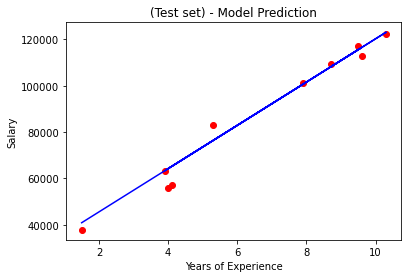

In [41]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('(Test set) - Model Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Outliers

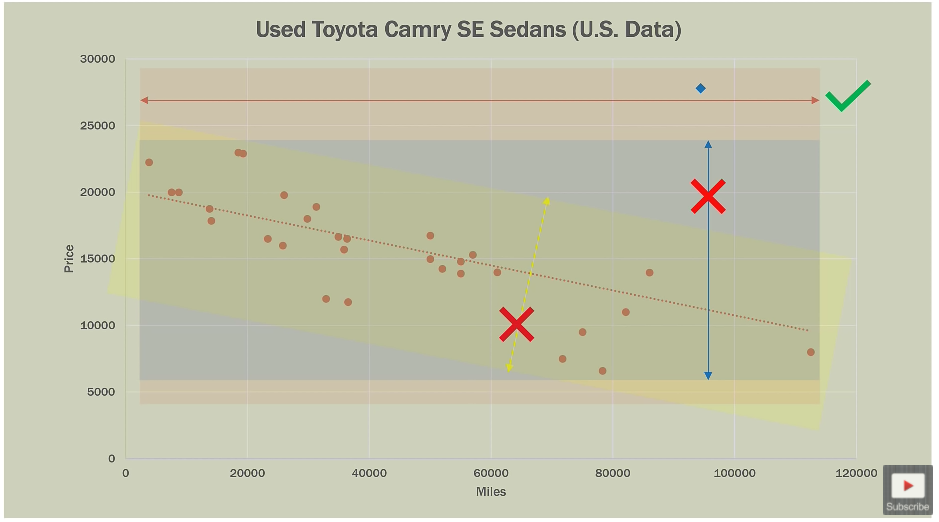

In [70]:
Image("D:/Yash/Capture7.PNG", width=700,height=600, embed=True)

#### Questions to ask ?
 #### - Possibility of 'fat-finger' error ?
 #### - Do the outliers / influential observations suggest a different model should be used (residual scatter plots might help)?
 #### - Questionable observattions (or biased observations) in the population ?
 #### - outlier occured just by random chance ?

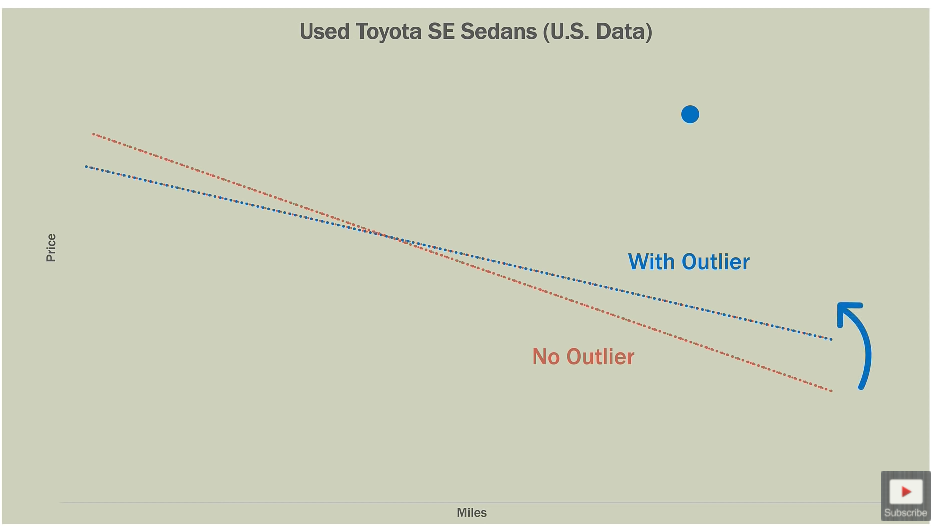

In [69]:
Image("D:/Yash/Capture8.PNG", width=700,height=600, embed=True)

#### Confidence intervals and prediction intervals

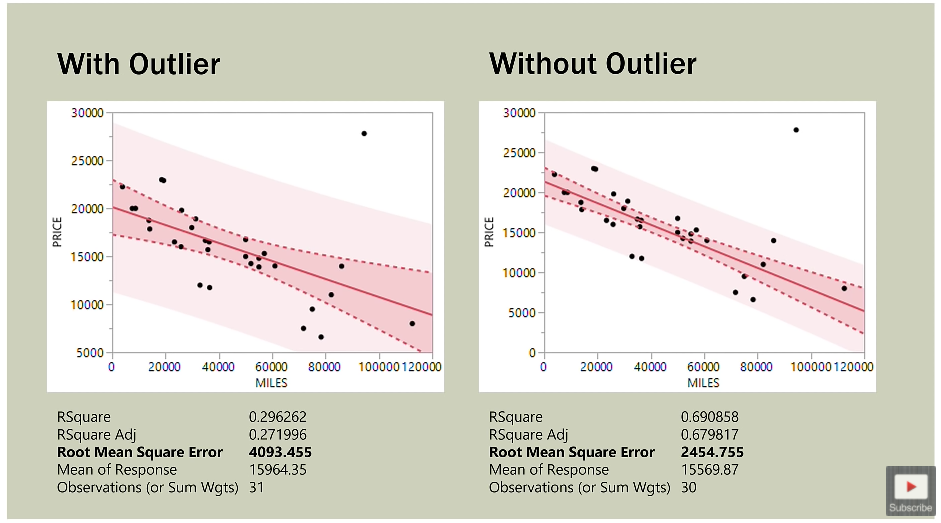

In [68]:
Image("D:/Yash/Capture9.PNG", width=700,height=600, embed=True)

A data point that deviates a lot from the rest of the points for the <b>IV</b> is called <b>high leverage point</b>

Leverage of data point $x_i$ : $$ h_i = \frac{1}{n} + \frac{(x_i - \overline{x})^2}{\sum_{i=1}^{n}{(x_i - \overline{x})^2}}$$

The decision value :               $$h_i > \frac{3(p+1)}{n}$$  
If $h_i$ > decision value, then, that point $x_i$ has large influence on regression analysis or is simply a <b>high leverage point</b>